In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import numba

3.384563586006098e-05
0.00029341677536826657
0.00045699635604191415
0.0005496127364222726
0.0006935847138991743
0.0011705297040437166
0.0014509061973049843
0.0018967577892048757
0.002054249669079861
0.002461443159117873
0.0037165197219054817
0.004331108890668761
0.004395058163417886
0.005133811767250601
0.005277281242797208
0.006021954828782081
0.006476393182614528
0.0067253925424683204
0.00694067235614497
0.007933515010264675
0.008068056299943963
0.009370811984101326
0.009662709133076059
0.010902367703565102
0.011005624370414637
0.01145009258055808
0.012304653092432796
0.012352970001806221
0.012506355165459988
0.012532599165984416
0.012718031877911476
0.013054430275917064
0.013155290088087867
0.013418916423212416
0.013726907098210533
0.01538428985841872
0.01549859229820266
0.015611784950774922
0.01614166939835834
0.016683869110770924
0.016925592610360495
0.0171924098901058
0.017225963316675127
0.017694538737056984
0.018404671847918972
0.018746224467847773
0.01909770097694097
0.0192231

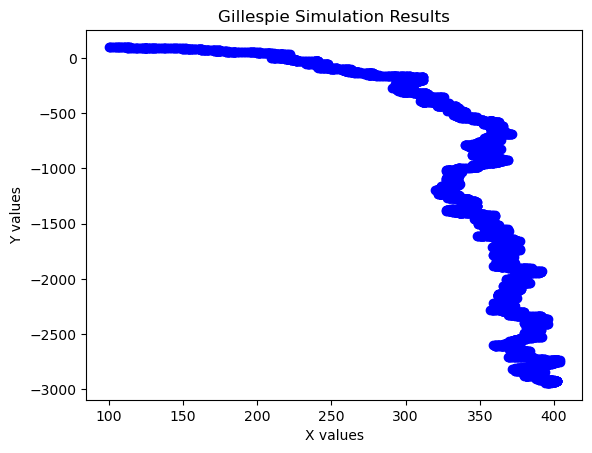

In [2]:
# parameters
VOLUME = 10e2
A = 2
B = 5

# initial state
X_INIT = 100
Y_INIT = 100
INITIAL_CONFIGURATION = np.array([X_INIT,Y_INIT])

@numba.njit
def transition_rate_vector(configuration):
    transition_rate_1 = A * VOLUME
    def transition_rate_2(x):
        return x    
    def transition_rate_3(x, y):
        return (1 / (VOLUME**2)) * x * (x - 1) * y
    def transition_rate_4(x):
        return B * x
    tmp = np.array([transition_rate_1, transition_rate_2(configuration[0]), transition_rate_3(configuration[0], configuration[1]), transition_rate_4(configuration[0])])
    return tmp

@numba.njit
def escape_rate (configuration):
    return np.sum(transition_rate_vector(configuration))

def residence_time_distribution(escape_rate, time):
    return escape_rate * np.exp(-escape_rate * time)

@numba.njit
def residence_time_cdf_inverse(escape_rate, cdf):
    return 1 / escape_rate * np.log(1 / cdf)

@numba.njit
def jump_function(old_configuration):
    rate_vector = transition_rate_vector(old_configuration)
    cumulative_sum = np.cumsum(rate_vector)
    rand = np.random.uniform(0, escape_rate(old_configuration))
    new_configuration = old_configuration.copy()

    if rand < cumulative_sum[0]: 
        new_configuration[0] += 1  # reaction 1
    elif rand < cumulative_sum[1]: 
        new_configuration[0] -= 1  # reaction 2
    elif rand < cumulative_sum[2]: 
        new_configuration[0] += 1  # reaction 3
        new_configuration[1] -= 1
    elif rand < cumulative_sum[3]: 
        new_configuration[0] -= 1  # reaction 4
        new_configuration[1] -= 1

    return new_configuration

def gillespie(initial_configuration, time_max):
    time_total = 0
    configurations = [] 
    current_configuration = initial_configuration
    while time_total < time_max:
        time_total += residence_time_cdf_inverse(escape_rate(current_configuration), np.random.random())
        current_configuration = jump_function(current_configuration)
        configurations.append(current_configuration)
        print(time_total)

    return configurations    

conf = gillespie(INITIAL_CONFIGURATION, 2)

# Extract x and y values
x_values, y_values = zip(*conf)

# Plot as points
plt.scatter(x_values, y_values, color='blue', marker='o')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Gillespie Simulation Results")
plt.show()
